In [1]:
import pandas as pd

In [8]:

obsesidade_peixes_data_frame = pd.read_csv("https://drive.google.com/uc?id=1cMmz4dSK0vcQCDsed_NjyW-6JsNbovYm")
obsesidade_peixes_data_frame.head()


,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


In [11]:
# X = features
# y = rotulos
X = obsesidade_peixes_data_frame[["Height", "Weight"]]
y = obsesidade_peixes_data_frame[["Obese"]]


In [10]:
obsesidade_peixes_data_frame.head()


,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0


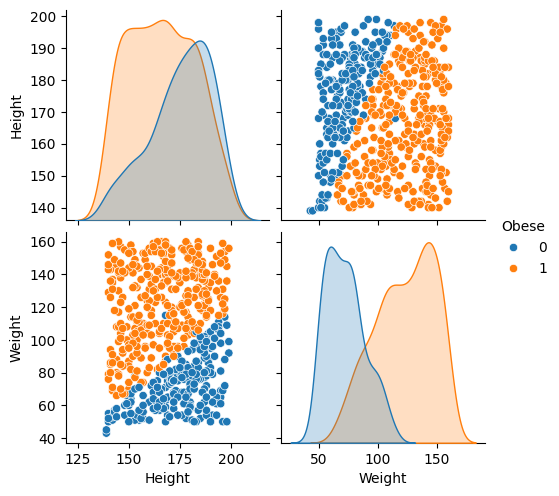

In [17]:
import seaborn as sns

sns.pairplot(obsesidade_peixes_data_frame, hue="Obese")


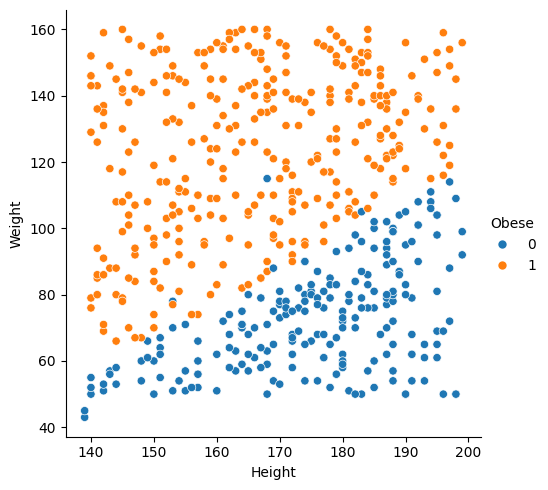

In [52]:
import seaborn as sns

sns.relplot(data=obsesidade_peixes_data_frame, x='Height', y='Weight', hue='Obese')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.svm import SVC

#modelo = SVC()
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [60]:
import numpy as np
from matplotlib import pyplot as plt

x = X_train["Weight"]
y = X_train["Height"]
label = y_train

plt.figure(figsize=(10, 5), dpi=120)

# Convert categorical labels to numeric
le = LabelEncoder()
label_numeric = le.fit_transform(label)

plt.scatter(x, y, c=label_numeric, cmap='viridis')

# The code below was copied from: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = modelo.decision_function(xy).reshape(X.shape)

# plot decision boundary and margins
ax.contour(X, Y, P, colors='k',
            levels=[-0.05, 0, 0.05], alpha=0.5,
            linestyles=['--', '-', '--'])

NameError: name 'LabelEncoder' is not defined

<Figure size 1200x600 with 0 Axes>

In [46]:
peixe_novo = [[163 , 1200]]
resultado = modelo.predict(peixe_novo)
print("Peixe novo é obeso 0 = NÃ0 e 1 = SIM",resultado)

Peixe novo é obeso 0 = NÃ0 e 1 = SIM [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo.predict(X_test)
print(confusion_matrix(y_test, y_pred))






[[44  1]
 [ 0 64]]


In [57]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = modelo.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print("Verdadeiros Positivos: ", tp)
print("Verdadeiros Negativos: ", tn)
print("Falsos Positivos: ", fp)
print("Falsos Negativos: ", fn)

print(classification_report(y_test,y_pred))

# Acurácia, ou: em geral, qual o percentual de acerto?
accuracy = (tp + tn) / (tp + tn + fp + fn)
print ("accuracy", accuracy)

#Precision, ou: entre os que previ serem positivos, qual o percentual de acerto?
precision = tp / (tp + fp)
print ("precision", precision)

#Recall, ou: entre os que são positivos, qual o percentual de acerto?
recall = tp / (tp + fn)
print ("recall", recall)

#f1 score: media harmônica de Precision e Recall
f1_score = 2 * ((precision * recall) / (precision + recall))
print ("f1_score", f1_score)


Verdadeiros Positivos:  64
Verdadeiros Negativos:  44
Falsos Positivos:  1
Falsos Negativos:  0
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        64

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

accuracy 0.9908256880733946
precision 0.9846153846153847
recall 1.0
f1_score 0.9922480620155039


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.98      1.00      0.99        64

    accuracy                           0.99       109
   macro avg       0.99      0.99      0.99       109
weighted avg       0.99      0.99      0.99       109

